In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [3]:
df = pd.read_csv('DataKelistrikan.csv')

In [4]:
df.head()

R      S      T      N    R-N    S-N    T-N   
0   26.0   27.0   28.0   29.0   30.0   31.0   32.0  \
1  325.0  287.0  365.0  148.0  223.0  222.0  230.0   
2  274.0  115.0  239.0  119.0  234.0  238.0  226.0   
3  192.0  163.0  181.0   88.0  223.0  225.0  235.0   
4  224.0  269.0  285.0  140.0  232.0  229.0  225.0   

   DELTA ARUS PHASA RMS MAX - MIN ARUS NETRAL DIBANDING ARUS PHASE TERENDAH  
0                            7.69                  ARUS NETRAL LEBIH BESAR   
1                           27.18                                   NORMAL   
2                          138.26                  ARUS NETRAL LEBIH BESAR   
3                           17.79                                   NORMAL   
4                           27.23                                   NORMAL

In [5]:
dff = df.copy()
column = list(dff.columns)
column = column[:8]
mean = []
for i in column:
    mean.append(dff[i].mean())
Mean = {
    'column':column,
    'mean':mean
}
dfff = pd.DataFrame(columns=Mean['column'])
for i in range(len(dff)):
    dfff.loc[i] = [np.nan for j in range(len(Mean['column']))]
print(len(dfff))
for i in range(len(dff)):
    value = []
    for j in range(len(Mean['mean'])):
        if(dff[Mean['column'][j]][i] < Mean['mean'][j]):
            value.append('A')
        if(dff[Mean['column'][j]][i] > Mean['mean'][j]):
            value.append('B')
    if i < len(dfff) and len(value) == len(Mean['column']):
        dfff.iloc[i] = list(value)


674


In [6]:
dfff['label'] = df['ARUS NETRAL DIBANDING ARUS PHASE TERENDAH']

In [7]:
dfff = dfff.dropna()
df = df.dropna()

In [8]:
dfff.isna().sum()

R                                 0
S                                 0
T                                 0
N                                 0
R-N                               0
S-N                               0
T-N                               0
DELTA ARUS PHASA RMS MAX - MIN    0
label                             0
dtype: int64

In [9]:
x = df[Mean['column']]
y = dfff['label']

In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
# Create Decision Tree Classifier with ID3 algorithm (criterion='entropy')
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train the model using the training set
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
# Predict the class labels for the test set
y_pred = classifier.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8389830508474576


In [13]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                            precision    recall  f1-score   support

 ARUS NETRAL LEBIH BESAR        0.78      0.76      0.77        41
                  NORMAL        0.87      0.88      0.88        77

                 accuracy                           0.84       118
                macro avg       0.82      0.82      0.82       118
             weighted avg       0.84      0.84      0.84       118

Confusion Matrix:
 [[31 10]
 [ 9 68]]


[Text(0.5546875, 0.9583333333333334, 'x[7] <= 66.785\nentropy = 0.97\nsamples = 470\nvalue = [187, 283]'),
 Text(0.359375, 0.875, 'x[0] <= 105.0\nentropy = 0.559\nsamples = 283\nvalue = [37, 246]'),
 Text(0.21875, 0.7916666666666666, 'x[3] <= 2.5\nentropy = 0.799\nsamples = 136\nvalue = [33, 103]'),
 Text(0.1875, 0.7083333333333334, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.25, 0.7083333333333334, 'x[2] <= 71.5\nentropy = 0.912\nsamples = 101\nvalue = [33, 68]'),
 Text(0.1875, 0.625, 'x[3] <= 54.5\nentropy = 0.993\nsamples = 62\nvalue = [28, 34]'),
 Text(0.15625, 0.5416666666666666, 'x[1] <= 61.5\nentropy = 0.941\nsamples = 53\nvalue = [19, 34]'),
 Text(0.125, 0.4583333333333333, 'x[3] <= 28.5\nentropy = 0.99\nsamples = 43\nvalue = [19, 24]'),
 Text(0.0625, 0.375, 'x[0] <= 8.5\nentropy = 0.837\nsamples = 30\nvalue = [8, 22]'),
 Text(0.03125, 0.2916666666666667, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.09375, 0.2916666666666667, 'x[3] <= 17.5\nentropy = 0.61

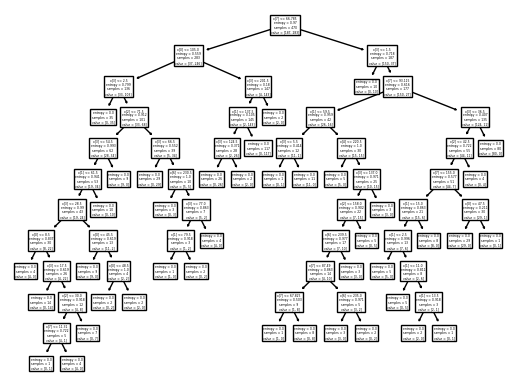

In [14]:
# Visualize the Decision Tree
tree.plot_tree(classifier)

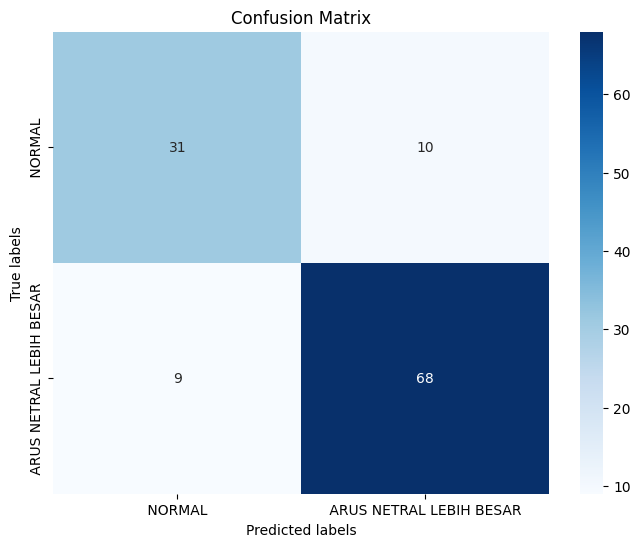

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix dengan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[" NORMAL ", ' ARUS NETRAL LEBIH BESAR '], yticklabels=[" NORMAL ", ' ARUS NETRAL LEBIH BESAR '])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
import pickle
pickle.dump(classifier, open('classifier_listrik.pkl', 'wb'))